# Import the library

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib

plt.style.use("seaborn")

In [10]:
df = pd.read_csv("loan_dataset.csv")

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [25]:
print('jumlah baris :', df.shape[0])
print('jumlah kolom :', df.shape[1])

jumlah baris : 614
jumlah kolom : 13


In [14]:
df.tail

<bound method NDFrame.tail of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849            

In [23]:
list_item =[]
for col in df.columns:
    list_item.append([col,df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]),df[col].unique(), df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='Feature Data_type Null_num Null_pct Unique_num Unique_sample'.split()) 
desc_df                 

,Feature,Data_type,Null_num,Null_pct,Unique_num,Unique_sample
0,Loan_ID,object,0,0.000000,"[LP001002, LP001003, LP001005, LP001006, LP001...","[LP001002, LP001003, LP001005, LP001006]"
1,Gender,object,13,2.117264,"[Male, Female, nan]","[Male, Female, nan]"
2,Married,object,3,0.488599,"[No, Yes, nan]","[No, Yes, nan]"
3,Dependents,object,15,2.442997,"[0, 1, 2, 3+, nan]","[0, 1, 2, 3+]"
4,Education,object,0,0.000000,"[Graduate, Not Graduate]","[Graduate, Not Graduate]"
5,Self_Employed,object,32,5.211726,"[No, Yes, nan]","[No, Yes, nan]"
6,ApplicantIncome,int64,0,0.000000,"[5849, 4583, 3000, 2583, 6000, 5417, 2333, 303...","[5849, 4583, 3000, 2583]"
7,CoapplicantIncome,float64,0,0.000000,"[0.0, 1508.0, 2358.0, 4196.0, 1516.0, 2504.0, ...","[0.0, 1508.0, 2358.0, 4196.0]"
8,LoanAmount,float64,22,3.583062,"[nan, 128.0, 66.0, 120.0, 141.0, 267.0, 95.0, ...","[nan, 128.0, 66.0, 120.0]"
9,Loan_Amount_Term,float64,14,2.280130,"[360.0, 120.0, 240.0, nan, 180.0, 60.0, 300.0,...","[360.0, 120.0, 240.0, nan]"


In [26]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [27]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

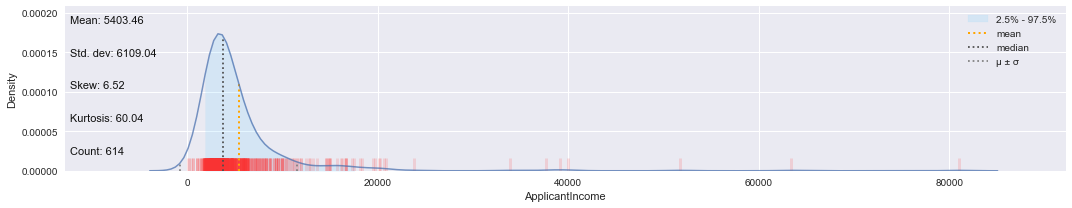

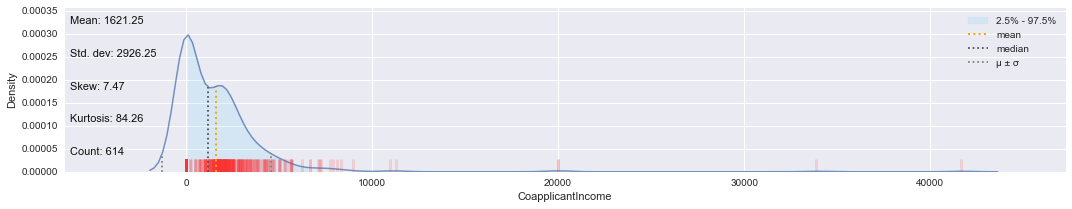

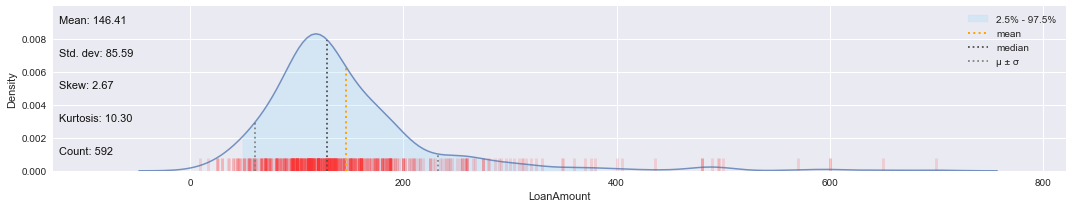

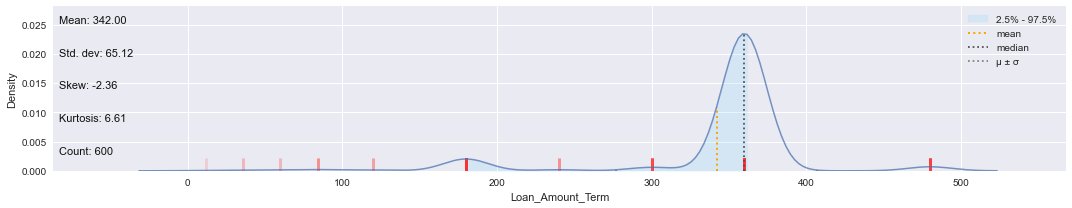

In [30]:
klib.dist_plot(df, size =3)

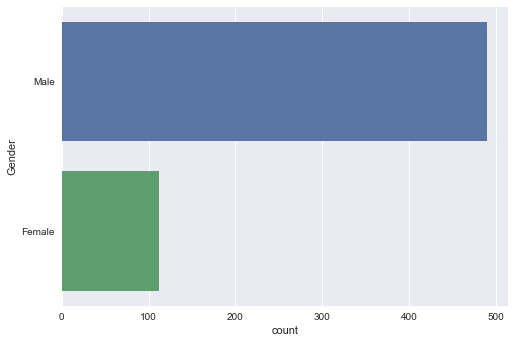

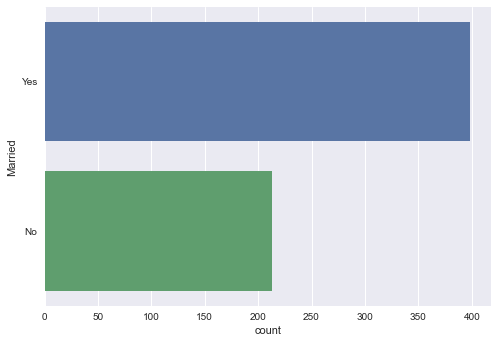

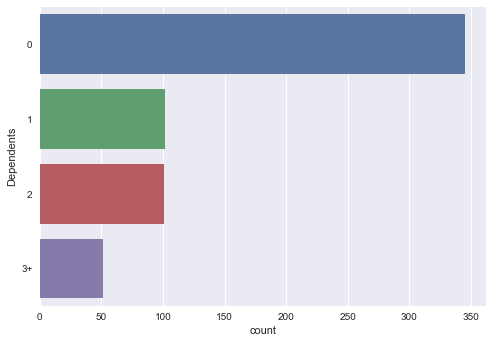

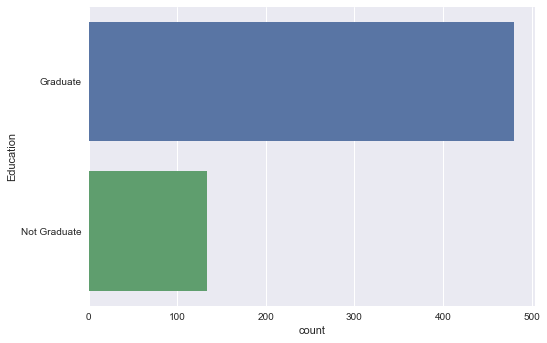

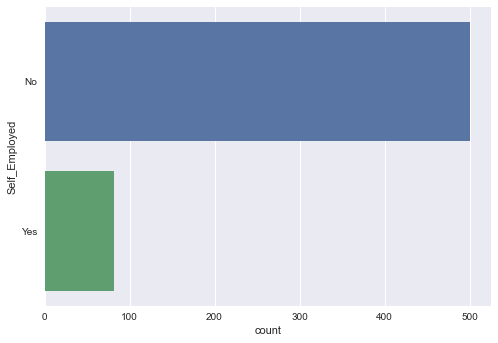

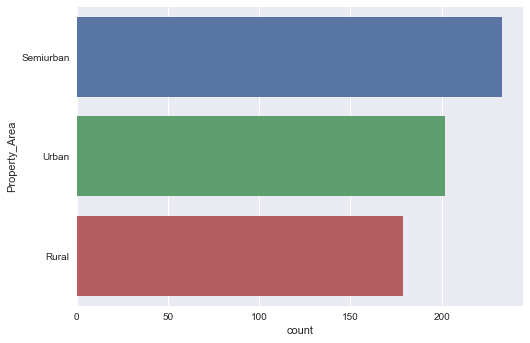

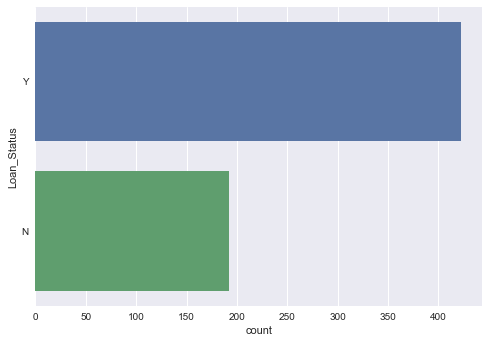

In [33]:
for column in df.select_dtypes(include='object'):
    if df[column].nunique()<15:
        sns.countplot(y=column,data=df,order=df[column].value_counts().index)
    plt.show()

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Amount_Term'>

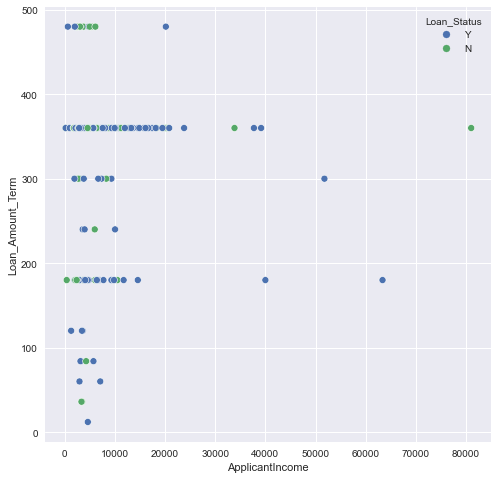

In [43]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='ApplicantIncome',y='Loan_Amount_Term',data=df, hue='Loan_Status')

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

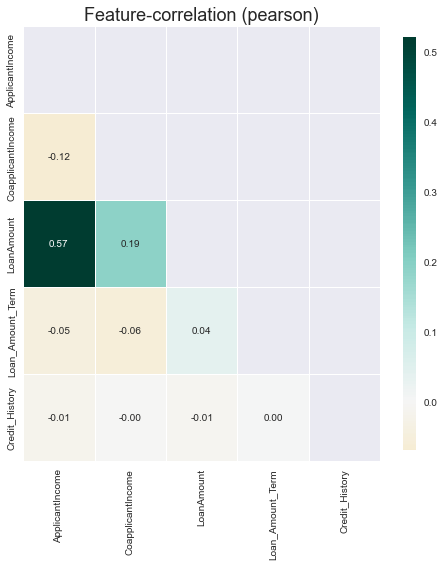

In [41]:
klib.corr_plot(df, annot=True, figsize= (8,8))
